<a href="https://colab.research.google.com/github/Mann2406/S4DS-repo/blob/task/TaskS4DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy.stats as stats

data = pd.read_csv("C:/Users/Mahesh/Downloads/Amazon Toy Products/amazon_co-ecommerce_sample.csv")

In [5]:
data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [6]:
data.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [7]:
data.drop(data.iloc[:, 15:895], inplace=True, axis=1)

In [8]:
data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,NaN
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,NaN,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,D

In [9]:
data.describe()

,number_of_answered_questions
count,9235.000000
mean,1.834976
std,2.517268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,39.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [11]:
data.nunique()

uniq_id                                        10000
product_name                                    9964
manufacturer                                    2651
price                                           2625
number_available_in_stock                         89
number_of_reviews                                194
number_of_answered_questions                      19
average_review_rating                             19
amazon_category_and_sub_category                 255
customers_who_bought_this_item_also_bought      8755
description                                     8514
product_information                             9939
product_description                             8514
items_customers_buy_after_viewing_this_item     6749
customer_questions_and_answers                   910
dtype: int64

In [12]:
data.sort_values(by="price", ascending=False).head(10)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
2228,4f705c302bdcf5d2b0c1df973d98f99f,DJI Phantom 2 with H3-3D Gimbal,DJI,£995.11,2 used,4,19.0,5.0 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/Propellers | http://ww...,Product Description Including the H3-3D Gimbal...,Technical Details Item Weight2.5 Kg Product Di...,Product Description Including the H3-3D Gimbal...,NaN,Does this come with the gimbal already install...
8229,f59a78feab8eb8c0843ca6921b259f9c,Mighty Morphin Power Rangers Legacy Dragon Dagger,Power Rangers,£99.99,NaN,15,1.0,5.0 out of 5 stars,Figures & Playsets > Accessories,http://www.amazon.co.uk/Mighty-Morphin-Power-R...,Product Description Power Rangers Legacy Drago...,Technical Details Item Weight998 g Product Dim...,Product Description Power Rangers Legacy Drago...,http://www.amazon.co.uk/Mighty-Morphin-Power-R...,NaN
5517,b05f26856ff7c58090bf1ba091cecd59,Millennium ChessGenius Chess Computer,Millenium,£99.99,NaN,1,1.0,5.0 out of 5 stars,Games > Chess,http://www.amazon.co.uk/LEXIBOOK-CG1300-Lexibo...,The MILLENNIUM ChessGenius utilises the ten ti...,Technical Details Manufacturer recommended age...,The MILLENNIUM ChessGenius utilises the ten ti...,http://www.amazon.co.uk/LEXIBOOK-CG1300-Lexibo...,NaN
3290,d0d5539f697f1506e9091f72b1c17dc1,Disguise Costumes Unisex - Adult Rental Teen S...,Disguise,£99.99,NaN,1,1.0,5.0 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/Disguise-Costumes-Spid...,Incogneato is a manufacturer of pop culture co...,Technical Details Item Weight907 g Product Dim...,Incogneato is a manufacturer of pop culture co...,NaN,i see the costume does not come with boot cove...
34,e3284186ff6c2c43380001cc010338f0,Bachmann 32-882 Fairburn 2-6-4 Tank 42062 BR L...,Bachmann,£99.95,2 new,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Bachmann-30-160-Rural-...,Suitable for the following scale(s): OO ScaleD...,Technical Details Manufacturer recommended age...,Suitable for the following scale(s): OO ScaleD...,NaN,NaN
3639,cac589b449d67442d6e92ae7c29c49f1,Trumpeter 1:16 - T-34/76 Model 1942,Trumpeter,£98.99,5 new,1,1.0,5.0 out of 5 stars,Hobbies > Model Building Kits > Accessories,http://www.amazon.co.uk/Trumpeter-Model-Factor...,Trumpeter 1:16 - T-34/76 Model 1942 - (TRU00905),Technical Details Item Weight2.4 Kg Product Di...,Trumpeter 1:16 - T-34/76 Model 1942 - (TRU00905),http://www.amazon.co.uk/Trumpeter-Model-Factor...,NaN
60,590ad6c0f9bdbbac7887ec4e36eb08a0,Hornby Railroad 00 Gauge LNER Class A1 Flying ...,Hornby,£98.50,9 new,6,1.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8243-Surface-M...,Product Description Hornby Railroad '00' Gauge...,Technical Details Item Weight499 g Product Dim...,Product Description Hornby Railroad '00' Gauge...,http://www.amazon.co.uk/Hornby-R1167-Flying-Sc...,NaN
7705,d84a640d691238b52eb39702a0d4f0c7,Power Loader with Ripley Figure and Poseable B...,AOSHIMA,£98.11,19 new,4,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/NECA-Aliens-7-Inch-Fig...,Warrant Officer Ellen Ripley's weapon-of-choic...,Technical Details Item Weight1.3 Kg Product Di...,Warrant Officer Ellen Ripley's weapon-of-choic...,http://www.amazon.co.uk/NECA-7-inch-Aliens-War...,as it states not the final product in the pict...
8542,ae1684a3be7ce7f732eef397fcfad9e6,Lamborghini Murcielago LP670-4 - Nero Nemesis ...,AUTOart,£96.95,9 new,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,NaN,The Murcielago was the flagship model from 200...,Technical Details Item Weight1.1 Kg Prod

In [13]:
data.sort_values(by="average_review_rating", ascending=True).head(10)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
7090,44dfca9d9ad6e388da2db5d070dd3834,Transformers - One Step Magic - Bumblebee,Hasbro,£12.64,6 new,4,1.0,2.3 out of 5 stars,Characters & Brands > Hasbro,http://www.amazon.co.uk/Transformers | http://...,Discover these incredible new transformers tha...,Technical Details Item Weight200 g Product Dim...,Discover these incredible new transformers tha...,http://www.amazon.co.uk/Transformers | http://...,NaN
3883,70016103cda846787a4b34fbcf6316f5,8 x Dry Wipe White Board Marker Pens Assorted ...,BINGWAN,£3.65,NaN,2,3.0,3.0 out of 5 stars,Fancy Dress > Accessories > Masks,http://www.amazon.co.uk/FACILLA-Magnetic-Drywi...,Dry Wipe White Board FOR USE WITH WHITE BOARDS...,Technical Details Manufacturer recommended age...,Dry Wipe White Board FOR USE WITH WHITE BOARDS...,http://www.amazon.co.uk/Velleda-1721-Whiteboar...,NaN
2829,224ad2c141f902d8488d2a55d1eea258,Large Inflatable Santa Clause / Father Christm...,Inflatable Santa,£5.99,NaN,2,NaN,3.0 out of 5 stars,Party Supplies > Decorations > Props,http://www.amazon.co.uk/Inflatable | http://ww...,This cheeky inflatable Santa / Father Christma...,Technical Details Manufacturer recommended age...,This cheeky inflatable Santa / Father Christma...,http://www.amazon.co.uk/Inflatable | http://ww...,NaN
1422,570e54da0af38718c0ea302a82d2588e,The Original Glowstars Company Glow in the Dar...,The Original Glowstars,£1.75,14 new,2,NaN,3.0 out of 5 stars,Arts & Crafts > Paper & Stickers,http://www.amazon.co.uk/The-Original-Glowstars...,Product Description The Original Glowstars Com...,Technical Details Item Weight41 g Product Dime...,Product Description The Original Glowstars Com...,http://www.amazon.co.uk/The-Original-Glowstars...,NaN
2206,8020c8cd2b86bd2e793241dd321d8921,Parrot Bebop Drone 2 (White),Parrot,£439.95,11 new,9,3.0,3.3 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/BTG-Upgrade-Battery310...,Colour Name:White and Black Product Descriptio...,Technical Details Item Weight503 g Product Dim...,Colour Name:White and Black Product Descriptio...,NaN,Can you use the skycontroller from the origina...
9825,9f693f0dc019eb6fdd5cdf26efd1cc25,Shut the Box - A Family Game of Chance - Child...,Cavendish Trading,£8.65,2 new,3,1.0,3.3 out of 5 stars,Games > Dice & Dice Games,http://www.amazon.co.uk/Shut-the-Box-Pocket-Si...,Shut the Box Brand new in box Box includes: 1 ...,Technical Details Item Weight522 g Product Dim...,Shut the Box Brand new in box Box includes: 1 ...,http://www.amazon.co.uk/Gibsons-Games-Shut-the...,NaN
860,a3f28e208fc1c738172ba51d923a676a,Tayo the Little Bus - Met the Subway Train,TAYO,£32.70,5 new,4,1.0,3.5 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/TAYO-Little-Korean-Ani...,Tayo the Little Bus - Met the Subway Train Sub...,Technical Details Item Weight635 g Product Dim...,Tayo the Little Bus - Met the Subway Train Sub...,http://www.amazon.co.uk/TAYO-The-Little-Carry-...,can I get the sounds it makes in English? // I...
2032,5db1daea86c49d870a553a1f60965ae7,"WowWee ""Robosapien X"" Controller with Dongle",Wow Wee,£75.99,10 new,8,1.0,3.5 out of 5 stars,Electronic Toys > Robots,http://www.amazon.co.uk/WowWee-Roboraptor | ht...,Product Description Robosapien X is an excitin...,Technical Details Item Weight2.1 Kg Product Di...,Product Description Robosapien X is an excitin...,http://www.amazon.co.uk/Wow-Wee-MiP-Robot-Whit...,Anyone been able to get the dongle to work? Wo...
6595,7f2fa6db542e0228a29a3b09889160e4,Crayola 8-Ultra Clean Marker Stampers,Crayola,£3.79,8 new,5,1.0,3.6 out of 5 stars,Characters & Brands > Crayola,http://www.amazon.co.uk/Crayola-52-3716-Gli

In [14]:
data['manufacturer'].value_counts().idxmax()

'LEGO'

In [15]:
data[data['manufacturer'].str.contains('LEGO', na=False)]

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
614,1cde07d3e45fdfb1b1966368d3b7a522,Lego City 2824: Advent Calendar 2010,LEGO,£43.87,19 new,40,6.0,4.7 out of 5 stars,NaN,http://www.amazon.co.uk/LEGO-City-60099-Advent...,"The holidays are coming to LEGO City, one gift...",Technical Details Item Weight440 g Product Dim...,"The holidays are coming to LEGO City, one gift...",http://www.amazon.co.uk/LEGO-City-60099-Advent...,NaN
626,900e782753c3cc6a6396da3315add573,LEGO Friends 41016: Advent Calendar,LEGO,£24.95,19 new,87,1.0,4.5 out of 5 stars,NaN,http://www.amazon.co.uk/LEGO-Friends-41040-Adv...,Product Description LEGO Friends Advent Calend...,Technical Details Item Weight218 g Product Dim...,Product Description LEGO Friends Advent Calend...,http://www.amazon.co.uk/LEGO-Friends-41102-Adv...,can you confirm that i will receive the calend...
627,15e03b806b3d90bced2186049c4f3613,LEGO Star Wars 75018: Jek-14's Stealth Starfig...,LEGO,£68.87,16 new,30,1.0,4.8 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/LEGO-Star-Wars-75004-H...,Product Description LEGO® Star Wars™ Jek-14’s ...,Technical Details Item Weight907 g Product Dim...,Product Description LEGO® Star Wars™ Jek-14’s ...,http://www.amazon.co.uk/Star-Wars-75102-Fighte...,NaN
634,e87cd0e23c41ae769787c4eeb4b7724c,LEGO City 7687 Advent Calendar 2009,LEGO,£24.99,17 new,45,4.0,4.8 out of 5 stars,NaN,http://www.amazon.co.uk/LEGO-City-60099-Advent...,Manufacturer's Description 24 days of LEGO® Ci...,Technical Details Item Weight399 g Product Dim...,Manufacturer's Description 24 days of LEGO® Ci...,http://www.amazon.co.uk/LEGO-City-60099-Advent...,NaN
651,ec2b46b7363449a91b66a0e721ae4b9a,LEGO Star Wars 75015: Corporate Alliance Tank ...,LEGO,£39.99,21 new,34,2.0,4.8 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/LEGO-Star-Wars-75016-H...,Product Description LEGO® Star Wars™ Corporate...,Technical Details Item Weight299 g Product Dim...,Product Description LEGO® Star Wars™ Corporate...,http://www.amazon.co.uk/LEGO-Star-Wars-75135-I...,what other figures can I buy to go with this s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,ae53ae168e599400f145116c076f4be6,LEGO® Super Heroes: Iron Man Minifigure (Mark 6),LEGO,£18.95,8 new,6,1.0,4.5 out of 5 stars,Figures & Playsets > Accessories,http://www.amazon.co.uk/LEGO-Heros-Figure-Capt...,LEGO Super Heroes: Iron Man (Mark 6) Minifigure,Technical Details Item Weight5 g Product Dimen...,LEGO Super Heroes: Iron Man (Mark 6) Minifigure,http://www.amazon.co.uk/GENUINE-Lego-Age-Ultro...,NaN
8285,6ac40066bc0cef3094a47cee32390b2c,LEGO Minifigures Series 8 - SANTA,LEGO,£8.44,8 new,12,1.0,4.6 out of 5 stars,Figures & Playsets > Accessories,http://www.amazon.co.uk/Lego-Mini-Figure-Serie...,LEGO Collectable Minifigures: Santa Minifigure...,Technical Details Item Weight113 g Product Dim...,LEGO Collectable Minifigures: Santa Minifigure...,http://www.amazon.co.uk/LEGO-Minifigures | htt...,NaN
8286,55944da5137e29a14af75629f0b016e2,LEGO® Ninjago - Cole ZX Minifigure,LEGO,£12.78,10 new,2,1.0,4.5 out of 5 stars,Figures & Playsets > Accessories,http://www.amazon.co.uk/Lloyd-Green-Ninja-Dual...,Figure is about 5cm tall.,Technical Details Item Weight9 g Product Dimen...,Figure is about 5cm tall.,http://www.amazon.co.uk/LEGO-70741-Ninjago-Air...,NaN
8972,d78173891efc811ca75e722d47cb16b0,LEGO Star Wars 75050: B-Wing,LEGO,NaN,43 new,29,1.0,4.9 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/LEGO-Star-Wars-75003-S...,Product Description Play out epic scenes from ...,Technical Details Item Weight762 g Product Dim...,Product Description Play out epic scenes from ...,htt

In [16]:
data.average_review_rating.value_counts(normalize=True)

average_review_rating
5.0 out of 5 stars    0.514927
4.0 out of 5 stars    0.131437
4.5 out of 5 stars    0.071929
4.8 out of 5 stars    0.056802
4.7 out of 5 stars    0.052895
4.3 out of 5 stars    0.040773
4.6 out of 5 stars    0.039271
4.4 out of 5 stars    0.029854
4.9 out of 5 stars    0.023743
4.2 out of 5 stars    0.021739
4.1 out of 5 stars    0.014526
3.9 out of 5 stars    0.000701
3.0 out of 5 stars    0.000301
3.6 out of 5 stars    0.000301
3.5 out of 5 stars    0.000200
3.3 out of 5 stars    0.000200
3.7 out of 5 stars    0.000200
3.8 out of 5 stars    0.000100
2.3 out of 5 stars    0.000100
Name: proportion, dtype: float64

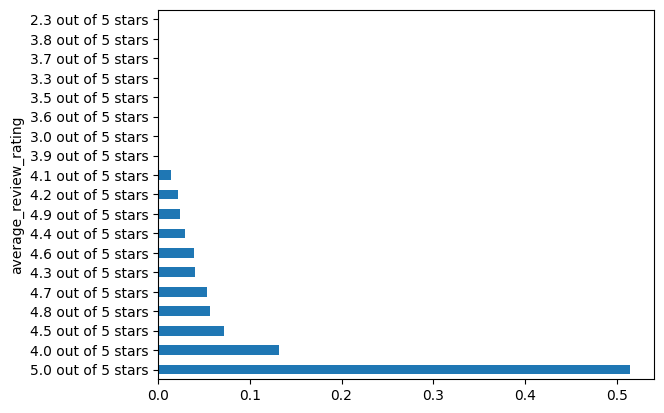

In [19]:
import matplotlib.pyplot as plt
data.average_review_rating.value_counts(normalize=True).plot.barh()
plt.show()